Imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
import pickle


import sys
sys.stdout = open('output_of_svm_fasttext.txt','wt')

#### Load data

In [7]:
X = np.load('data/X_fasttext_embeddings.npy') 
y = np.load('data/y_binarized.npy') 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
#creating a validation set for hyperparameter tuning
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)


Tags for plotting

In [ ]:
tags = np.load('data/y_tags.npy', allow_pickle=True)

# SVM

SVM multiple binary classifiers

In [9]:
def train_svm(class_wt = None, name=None):
    SVM_model_list = []
    for i in range(y_train.shape[1]):
        sample_y_train = y_train[:, i]
        SVM_clf_single = LinearSVC(dual=False, class_weight=class_wt)
        SVM_clf_single.fit(X_train, sample_y_train)
        SVM_model_list.append(SVM_clf_single)
    with open(name, 'wb') as f:
        pickle.dump(SVM_model_list, f)
    return SVM_model_list

    

In [10]:
def pred_svm(model, x_data):
    return model.predict(x_data)

In [11]:
def calc_scores(name, SVM_model_list):
    precision_tr = []
    precision_v = []
    recall_tr = []
    recall_v = []
    f1_tr = []
    f1_v = []
    accu_tr = []
    accu_v = []
    
    for i in range(len(SVM_model_list)):
        y_pred_tr = pred_svm(SVM_model_list[i], X_train)
        y_pred_v = pred_svm(SVM_model_list[i] ,(X_val))

        precision_tr.append(precision_score(y_pred=y_pred_tr, y_true=y_train[:,i]))
        precision_v.append(precision_score(y_pred=y_pred_v, y_true=y_val[:,i]))

        recall_tr.append(recall_score(y_pred=y_pred_tr, y_true=y_train[:,i]))
        recall_v.append(recall_score(y_pred=y_pred_v, y_true=y_val[:,i]))

        f1_tr.append(f1_score(y_pred=y_pred_tr, y_true=y_train[:,i]))
        f1_v.append(f1_score(y_pred=y_pred_v, y_true=y_val[:,i]))

        accu_tr.append(accuracy_score(y_pred=y_pred_tr, y_true=y_train[:,i]))
        accu_v.append(accuracy_score(y_pred=y_pred_v, y_true=y_val[:,i]))

    with open("./results/precision_cw_tr_"+name+".txt", "w") as output:
        output.write(str(y_pred_tr))
    with open("./results/precision_cw_v_"+name+".txt", "w") as output:
        output.write(str(y_pred_v))
    with open("./results/recall_cw_tr"+name+".txt", "w") as output:
        output.write(str(recall_tr))
    with open("./results/recall_cw_v"+name+".txt", "w") as output:
        output.write(str(recall_v))
    with open("./results/f1_cw_tr"+name+".txt", "w") as output:
        output.write(str(f1_tr))
    with open("./results/f1_cw_v"+name+".txt", "w") as output:
        output.write(str(f1_v))
    with open("./results/accu_cw_tr"+name+".txt", "w") as output:
        output.write(str(accu_tr))
    with open("./results/accu_cw_v"+name+".txt", "w") as output:
        output.write(str(accu_v))
    
    return precision_tr, precision_v, recall_tr, recall_v, f1_tr, f1_v, accu_tr, accu_v

In [12]:
def plotting_metrics(metric_list, name, tags=tags):
    disp_df = pd.DataFrame(
        {'tags': tags,
        'prec': metric_list
        })
    disp_df = disp_df.sort_values(by = 'prec' , ascending=False)
    plt.figure(figsize=(300, 200), dpi=200)
    plt.bar(disp_df['tags'], disp_df['prec'])
    plt.xticks(fontsize=10)
    plt.savefig(name)

SVM for class weight set to None

In [15]:
start_time = time.time()
SVM_model_list = train_svm(name='./models/svm_none_wt_model_list_fasttext.pkl')
print('Execution time for SVM with None class weight, for fasttext embeddings',time.time()-start_time)


SVM for class weight set to balanced

In [ ]:
start_time = time.time()
SVM_model_list_bal = train_svm(class_wt='balanced', name='./models/svm_bal_wt_model_list_fasttext.pkl')
print('Execution time for SVM with balanced class weight, for fasttext embeddings',time.time()-start_time)

SVM for class weight set to 1:10

In [ ]:
start_time = time.time()
SVM_model_list_self = train_svm(class_wt={0:1, 1:10},name='./models/svm_self_wt_model_list_fasttext.pkl')
print('Execution time for SVM with 1:10 class weight, for fasttext embeddings',time.time()-start_time)


Trained models can be loaded using the following lines

In [13]:
# SVM_model_list = pickle.load(open('./models/svm_none_wt_model_list_fasttext.pkl', 'rb'))
# SVM_model_list_bal = pickle.load(open('./models/svm_bal_wt_model_list_fasttext.pkl', 'rb'))
# SVM_model_list_self = pickle.load(open('./models/svm_self_wt_model_list_fasttext.pkl', 'rb'))

Calculating evaluation metrics for SVM with class weight = None

In [ ]:
precision_cw_none_tr, precision_cw_none_v,recall_cw_none_tr,recall_cw_none_v, f1_cw_none_tr, f1_cw_none_v, accu_cw_none_tr, accu_cw_none_v = calc_scores('none',SVM_model_list)
f1_mean_cw_none_v = np.mean(f1_cw_none_v)
accu_mean_cw_none_v = np.mean(accu_cw_none_v)
print("F1 mean for none for fasttext: ", f1_mean_cw_none_v)
print("accuracy mean for none for fasttext: ", accu_mean_cw_none_v)

Calculating evaluation metrics for SVM with class weight = balanced

In [ ]:
precision_cw_bal_tr, precision_cw_bal_v,recall_cw_bal_tr,recall_cw_bal_v, f1_cw_bal_tr, f1_cw_bal_v, accu_cw_bal_tr, accu_cw_bal_v = calc_scores('bal',SVM_model_list_bal)
f1_mean_cw_bal_v = np.mean(f1_cw_bal_v)
accu_mean_cw_bal_v = np.mean(accu_cw_bal_v)
print("F1 mean for balanced for fasttext: ", f1_mean_cw_bal_v)
print("accuracy mean for balanced for fasttext: ", accu_mean_cw_bal_v)

F1 mean:  0.11607106113110945
accuracy mean:  0.8854633981607787


Calculating evaluation metrics for SVM with class weight = 1:10

In [ ]:
precision_cw_self_tr, precision_cw_self_v,recall_cw_self_tr,recall_cw_self_v, f1_cw_self_tr, f1_cw_self_v, accu_cw_self_tr, accu_cw_self_v = calc_scores('self',SVM_model_list_self)
f1_mean_cw_self_v = np.mean(f1_cw_self_v)
accu_mean_cw_self_v = np.mean(accu_cw_self_v)
print("F1 mean for 1:10 for fasttext: ", f1_mean_cw_self_v)
print("accuracy mean for 1:10 for fasttext: ", accu_mean_cw_self_v)

Confusion matrix for the best model:

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
idx_good = np.where(tags=='cs.LG')[0][0]
idx_avg = np.where(tags=='cs.NE')[0][0]
idx_bad = np.where(tags=='cs.NA')[0][0]
print(idx_avg)
y_pred_v_good = SVM_model_list[idx_good].predict(X_val)
y_pred_v_avg = SVM_model_list[idx_avg].predict(X_val)
y_pred_v_bad = SVM_model_list[idx_bad].predict(X_val)

m_good = confusion_matrix(y_pred=y_pred_v_good, y_true=y_val[:,idx_good])
m_avg = confusion_matrix(y_pred=y_pred_v_avg, y_true=y_val[:,idx_avg])
m_bad = confusion_matrix(y_pred=y_pred_v_bad, y_true=y_val[:,idx_bad])


32


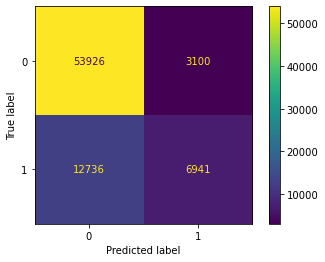

In [ ]:
plt_good = ConfusionMatrixDisplay(m_good).plot()

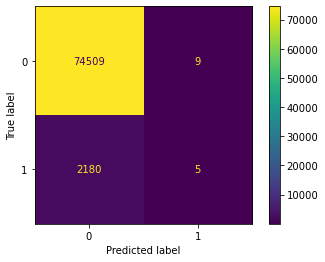

In [ ]:
plt_avg = ConfusionMatrixDisplay(m_avg).plot()

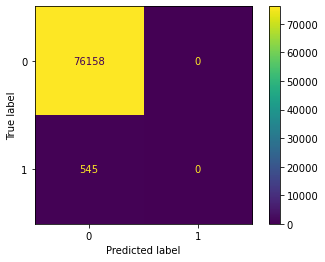

In [ ]:
plt_bad = ConfusionMatrixDisplay(m_bad).plot()

In [ ]:
# plotting_metrics(recall_cw_self_v, './results/recall_class_self_wt.png')
# plotting_metrics(f1_cw_self_v, './results/f1_cw_self_v.png')
# plotting_metrics(precision_cw_self_v, './results/precision_cw_self_v.png')